In [1]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

22812


In [2]:
# Required plotting setting
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
plt.rc('font', family='serif')
plt.rc('font', serif='Arial')

from ImageAnalysis3.figure_tools import _single_col_width, _font_size, _ticklabel_size,_ticklabel_width

In [3]:
postanalysis_folder = r'\\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis'
print(postanalysis_folder)
dark_mode = True
if dark_mode:
    figure_folder = os.path.join(postanalysis_folder, 'Figures_0903_dark')
    plt.style.use('dark_background')
else:
    figure_folder = os.path.join(postanalysis_folder, 'Figures_0817')
print(figure_folder)


comp_figure_folder = os.path.join(figure_folder, 'AB_compartment')

if not os.path.exists(comp_figure_folder):
    print(f"Create: {comp_figure_folder}")
    os.makedirs(comp_figure_folder)
else:
    print(f"Use: {comp_figure_folder}")
median_figure_folder = os.path.join(figure_folder, 'Median_distmap')

if not os.path.exists(median_figure_folder):
    print(f"Create: {median_figure_folder}")
    os.makedirs(median_figure_folder)
else:
    print(f"Use: {median_figure_folder}")

\\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis
\\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis\Figures_0903_dark
Use: \\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis\Figures_0903_dark\AB_compartment
Use: \\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis\Figures_0903_dark\Median_distmap


## load codebook

In [4]:
import pandas as pd
codebook = pd.read_csv(r'\\10.245.74.158\Chromatin_NAS_8\Exported_data\20220713-Export\merged_codebook.csv')
sort_by_region = False
from ImageAnalysis3.structure_tools import distance

chr_2_indices, chr_2_orders = distance.Generate_PlotOrder(codebook, codebook, sort_by_region=sort_by_region)

In [5]:
class_2_chr2Zxys_filename = os.path.join(postanalysis_folder, 'class_2_chr2Zxys.pkl')
class_2_chr2ZxysList = pickle.load(open(class_2_chr2Zxys_filename, 'rb'))

In [6]:
for _cls in class_2_chr2ZxysList:
    print(_cls, len(class_2_chr2ZxysList[_cls]))

Gluta 13719
GABA 4966
Astro 3822
Endo 2891
Micro 1523
Oligo 6333


In [7]:
class_2_median_filename = os.path.join(postanalysis_folder, 'class_2_medianDict.pkl')
print(class_2_median_filename)

if os.path.exists(class_2_median_filename):
    print("Loading")
    class_2_medianDict = np.load(class_2_median_filename, allow_pickle=True)
else:
    from ImageAnalysis3.structure_tools.distance import Chr2ZxysList_2_summaryDist_by_key,Chr2ZxysList_2_summaryDict
    # calculate prob
    class_2_medianDict = {}
    for _class in class_2_chr2ZxysList:
        class_2_medianDict[_class] = Chr2ZxysList_2_summaryDict(
            class_2_chr2ZxysList[_class], 
            total_codebook=codebook, 
            num_threads=44, verbose=True)
    
    print(f"Saving to: {class_2_median_filename}")
    pickle.dump(class_2_medianDict, open(class_2_median_filename, 'wb'))

\\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis\class_2_medianDict.pkl
Loading


<IPython.core.display.Javascript object>


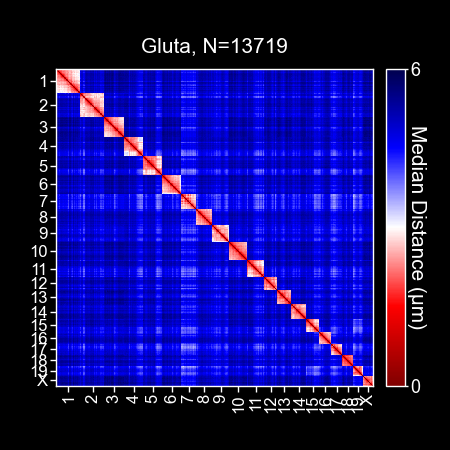

<IPython.core.display.Javascript object>


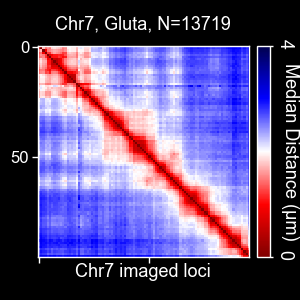

<IPython.core.display.Javascript object>


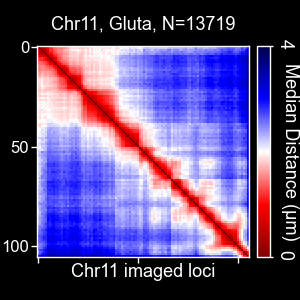

<IPython.core.display.Javascript object>


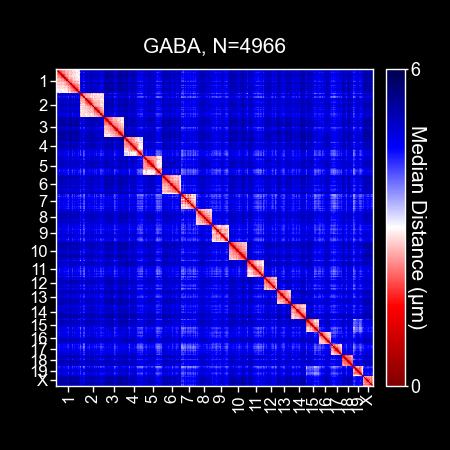

<IPython.core.display.Javascript object>


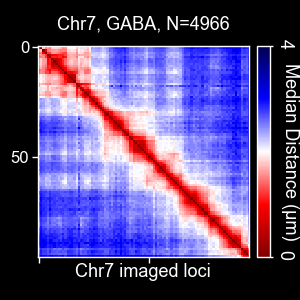

<IPython.core.display.Javascript object>


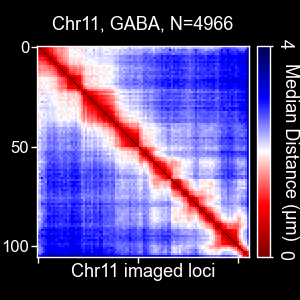

<IPython.core.display.Javascript object>


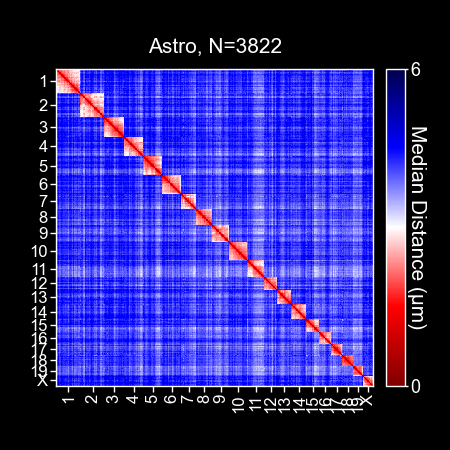

<IPython.core.display.Javascript object>


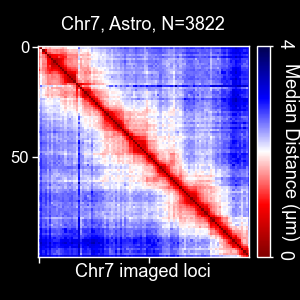

<IPython.core.display.Javascript object>


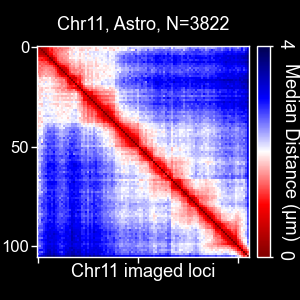

<IPython.core.display.Javascript object>


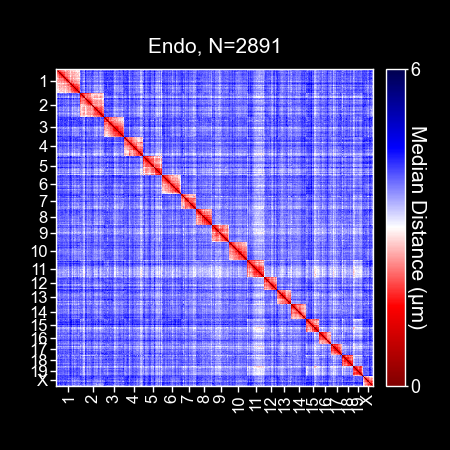

<IPython.core.display.Javascript object>


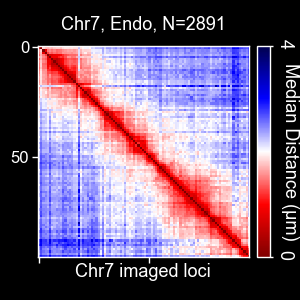

<IPython.core.display.Javascript object>


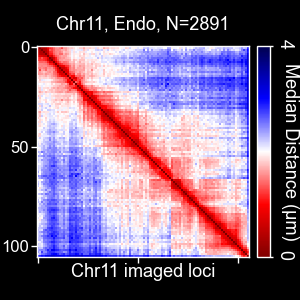

<IPython.core.display.Javascript object>


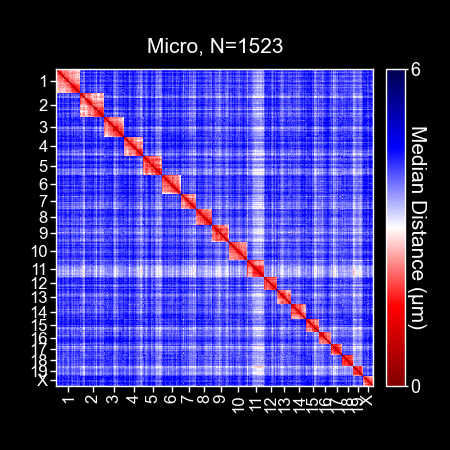

<IPython.core.display.Javascript object>


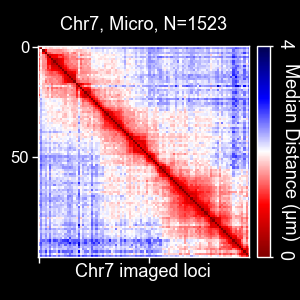

<IPython.core.display.Javascript object>


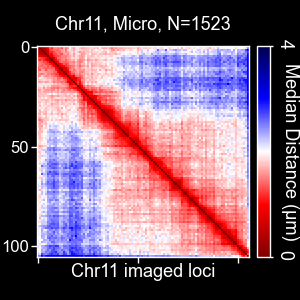

<IPython.core.display.Javascript object>


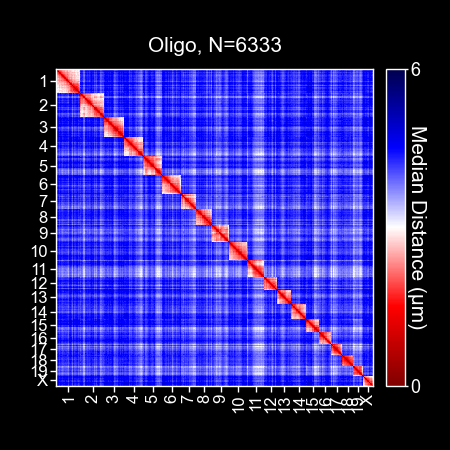

<IPython.core.display.Javascript object>


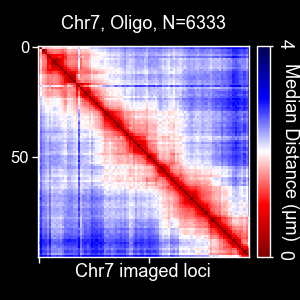

<IPython.core.display.Javascript object>


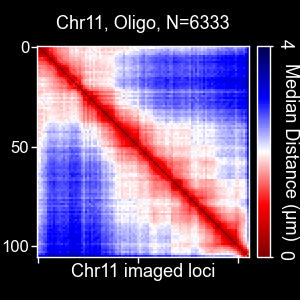

In [8]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
plot_chrs = ['7', '11']
#sel_classes = ['Astro', 'Oligo', 'L2/3 IT']
sel_classes = [_cls for _cls in class_2_medianDict.keys() if _cls not in ['other']]
for _cls in sel_classes:
    _median_mat, _chr_edges, _chr_names = distance.assemble_ChrDistDict_2_Matrix(
        class_2_medianDict[_cls], codebook, use_cis=True, use_trans=False, sort_by_region=False)
    
    
    fig, ax1 = plt.subplots(figsize=(_single_col_width,_single_col_width), dpi=200)

    # create a color map
    median_cmap = cm.get_cmap('seismic_r').copy()
    median_cmap.set_bad(color=[0.5,0.5,0.5,1])

    vmin,vmax = 0,6

    _pf = ax1.imshow(_median_mat, 
                     cmap=median_cmap, vmin=vmin, vmax=vmax, interpolation='nearest')

    ax1.set_title(f"{_cls}, N={len(class_2_chr2ZxysList[_cls])}", fontsize=_font_size)
    ax1.set_yticks( (_chr_edges[1:] + _chr_edges[:-1])[:-1] / 2 ,)
    ax1.set_yticklabels(_chr_names[:-1],)
    ax1.set_xticks( (_chr_edges[1:] + _chr_edges[:-1])[:-1] / 2 ,)
    ax1.set_xticklabels(_chr_names[:-1], rotation=90)

    #ax1.hlines(_chr_edges-0.5, 0, len(_median_mat), color='yellow', linewidth=0.2)
    #ax1.vlines(_chr_edges-0.5, 0, len(_median_mat), color='yellow', linewidth=0.2)
    ax1.xaxis.set_tick_params(which='both', labelbottom=True)
    ax1.yaxis.set_tick_params(which='both', labelleft=True)
    ax1.set_xlim([0, len(_median_mat)])
    ax1.set_ylim([len(_median_mat), 0])

    ax1.tick_params('both', labelsize=_font_size-1.5, 
                    width=_ticklabel_width, length=_ticklabel_size,
                    pad=1, labelleft=True, labelbottom=True) # remove bottom ticklabels for ax1
    [i[1].set_linewidth(_ticklabel_width) for i in ax1.spines.items()]

    # locate ax1
    divider = make_axes_locatable(ax1)
    # colorbar ax
    cax = divider.append_axes('right', size='6%', pad="4%")
    cbar = plt.colorbar(_pf,cax=cax, ax=ax1)
    cbar.ax.tick_params('both', labelsize=_font_size-1, 
                    width=_ticklabel_width, length=_ticklabel_size-1,
                    pad=1, labelleft=False) # remove bottom ticklabels for ax1
    [i[1].set_linewidth(_ticklabel_width) for i in cbar.ax.spines.items()]

    cbar.set_ticks([vmin,vmax])
    cbar.outline.set_linewidth(_ticklabel_width)
    cbar.set_label('Median Distance (\u03BCm)', 
                   fontsize=_font_size, labelpad=2, rotation=270)
    cbar.ax.minorticks_off()

    plt.savefig(os.path.join(median_figure_folder, 
                             f"trans_wCis_median_major_{_cls.replace(r'/','_').replace(' ', '_')}.pdf"),
                transparent=True, bbox_inches='tight', pad_inches=0.1, dpi=300)
    plt.savefig(os.path.join(median_figure_folder, 
                             f"trans_wCis_median_major_{_cls.replace(r'/','_').replace(' ', '_')}.png"),
                transparent=True, bbox_inches='tight', pad_inches=0.1, dpi=300)
    plt.show()
    
    
    # sel_chr
    for sel_chr in plot_chrs:

        fig, ax1 = plt.subplots(figsize=(1.5,1.5), dpi=200)

        # create a color map
        median_cmap = cm.get_cmap('seismic_r').copy()
        median_cmap.set_bad(color=[0.5,0.5,0.5,1])

        vmin,vmax = 0,4

        _pf = ax1.imshow(class_2_medianDict[_cls][f"cis_{sel_chr}"], 
                         cmap=median_cmap, vmin=vmin, vmax=vmax, interpolation='nearest')

        ax1.set_title(f"Chr{sel_chr}, {_cls}, N={len(class_2_chr2ZxysList[_cls])}", fontsize=_font_size-1)
        ax1.set_xlabel(f"Chr{sel_chr} imaged loci", fontsize=_font_size-1, labelpad=2)
        ax1.set_yticks(np.arange(0, len(chr_2_orders[sel_chr]), 50))
        #ax1.set_yticklabels(_chr_names[:-1],)
        ax1.set_xticks( np.arange(0, len(chr_2_orders[sel_chr]), 50))
        #ax1.set_xticklabels(_chr_names[:-1], rotation=45)

        ax1.xaxis.set_tick_params(which='both', labelbottom=True)
        ax1.yaxis.set_tick_params(which='both', labelleft=True)
        ax1.set_xlim([-0.5, len(chr_2_orders[sel_chr])-0.5])
        ax1.set_ylim([len(chr_2_orders[sel_chr])-0.5, -0.5])

        ax1.tick_params('both', labelsize=_font_size-1.5, 
                        width=_ticklabel_width, length=_ticklabel_size,
                        pad=1, labelleft=True, labelbottom=False) # remove bottom ticklabels for ax1
        [i[1].set_linewidth(_ticklabel_width) for i in ax1.spines.items()]

        # locate ax1
        divider = make_axes_locatable(ax1)
        # colorbar ax
        cax = divider.append_axes('right', size='6%', pad="4%")
        cbar = plt.colorbar(_pf,cax=cax, ax=ax1)
        cbar.ax.tick_params('both', labelsize=_font_size-1, 
                        width=_ticklabel_width, length=_ticklabel_size-1,
                        pad=1, labelleft=False) # remove bottom ticklabels for ax1
        [i[1].set_linewidth(_ticklabel_width) for i in cbar.ax.spines.items()]

        cbar.set_ticks([vmin,vmax])
        cbar.ax.set_yticklabels([vmin,vmax], rotation=270)
        cbar.outline.set_linewidth(_ticklabel_width)
        cbar.set_label('Median Distance (\u03BCm)', 
                       fontsize=_font_size-1, labelpad=2, rotation=270)
        cbar.ax.minorticks_off()
        plt.savefig(os.path.join(median_figure_folder, 
                                 f"cis_median_major_{_cls.replace(r'/','_').replace(' ', '_')}_{sel_chr}.png"),
                    transparent=True, bbox_inches='tight', pad_inches=0.1, dpi=300)                    
        plt.savefig(os.path.join(median_figure_folder, 
                                 f"cis_median_major_{_cls.replace(r'/','_').replace(' ', '_')}_{sel_chr}.pdf"),
                    transparent=True, bbox_inches='tight', pad_inches=0.1, dpi=300)
        plt.show()
    
    #break
    

In [23]:
plt.close('all')

<IPython.core.display.Javascript object>


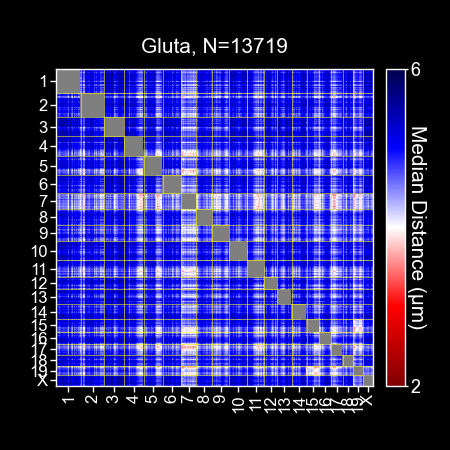

<IPython.core.display.Javascript object>


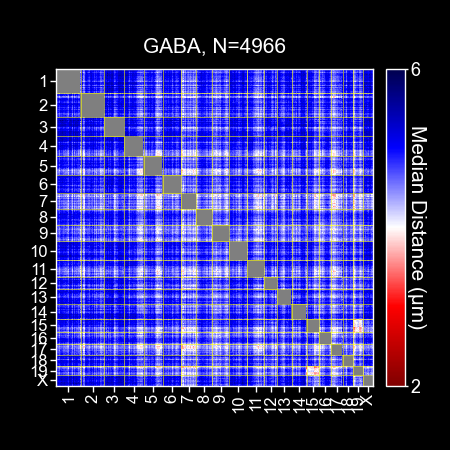

C:\Users\puzheng\AppData\Local\Temp/ipykernel_22812/1644491570.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax1 = plt.subplots(figsize=(_single_col_width,_single_col_width), dpi=200)


<IPython.core.display.Javascript object>


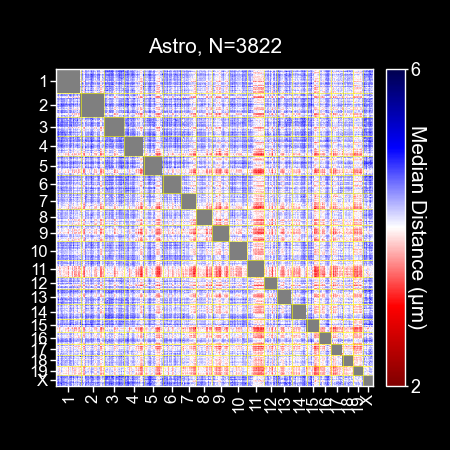

<IPython.core.display.Javascript object>


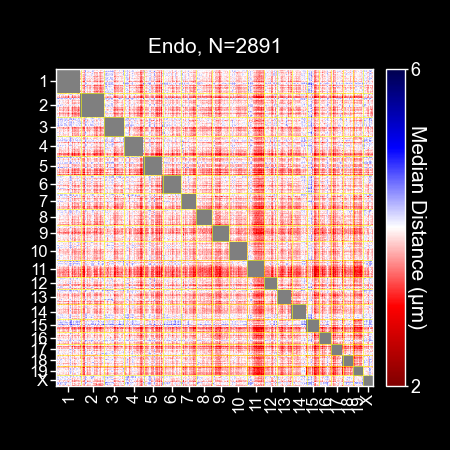

<IPython.core.display.Javascript object>


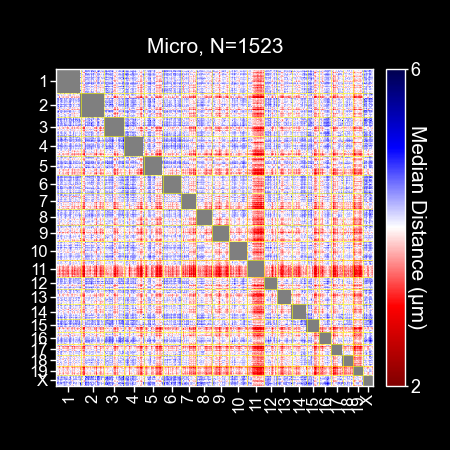

<IPython.core.display.Javascript object>


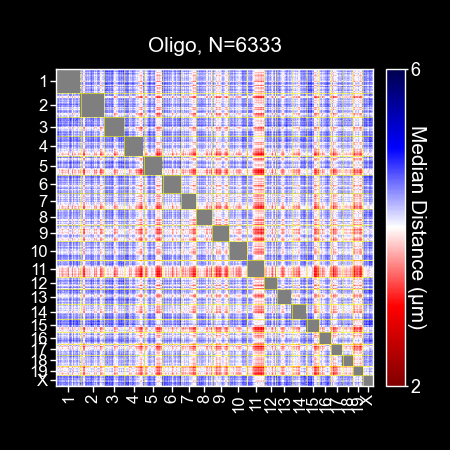

In [9]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
class_2_transMedianMat = {}
sel_classes = [_cls for _cls in class_2_medianDict.keys() if _cls not in ['other']]

for _cls in sel_classes:
    _median_mat, _chr_edges, _chr_names = distance.assemble_ChrDistDict_2_Matrix(
        class_2_medianDict[_cls], codebook, use_cis=False, use_trans=False, sort_by_region=False)
    class_2_transMedianMat[_cls] = _median_mat
    
    fig, ax1 = plt.subplots(figsize=(_single_col_width,_single_col_width), dpi=200)

    # create a color map
    median_cmap = cm.get_cmap('seismic_r').copy()
    median_cmap.set_bad(color=[0.5,0.5,0.5,1])

    vmin,vmax = 2,6

    _pf = ax1.imshow(_median_mat, 
                     cmap=median_cmap, vmin=vmin, vmax=vmax, interpolation='nearest')

    ax1.set_title(f"{_cls}, N={len(class_2_chr2ZxysList[_cls])}", fontsize=_font_size)
    ax1.set_yticks( (_chr_edges[1:] + _chr_edges[:-1])[:-1] / 2 ,)
    ax1.set_yticklabels(_chr_names[:-1],)
    ax1.set_xticks( (_chr_edges[1:] + _chr_edges[:-1])[:-1] / 2 ,)
    ax1.set_xticklabels(_chr_names[:-1], rotation=90)

    ax1.hlines(_chr_edges-0.5, 0, len(_median_mat), color='yellow', linewidth=0.2)
    ax1.vlines(_chr_edges-0.5, 0, len(_median_mat), color='yellow', linewidth=0.2)
    ax1.xaxis.set_tick_params(which='both', labelbottom=True)
    ax1.yaxis.set_tick_params(which='both', labelleft=True)
    ax1.set_xlim([0, len(_median_mat)])
    ax1.set_ylim([len(_median_mat), 0])

    ax1.tick_params('both', labelsize=_font_size-1.5, 
                    width=_ticklabel_width, length=_ticklabel_size,
                    pad=1, labelleft=True, labelbottom=True) # remove bottom ticklabels for ax1
    [i[1].set_linewidth(_ticklabel_width) for i in ax1.spines.items()]

    # locate ax1
    divider = make_axes_locatable(ax1)
    # colorbar ax
    cax = divider.append_axes('right', size='6%', pad="4%")
    cbar = plt.colorbar(_pf,cax=cax, ax=ax1)
    cbar.ax.tick_params('both', labelsize=_font_size-1, 
                    width=_ticklabel_width, length=_ticklabel_size-1,
                    pad=1, labelleft=False) # remove bottom ticklabels for ax1
    [i[1].set_linewidth(_ticklabel_width) for i in cbar.ax.spines.items()]

    cbar.set_ticks([vmin,vmax])
    cbar.outline.set_linewidth(_ticklabel_width)
    cbar.set_label('Median Distance (\u03BCm)', 
                   fontsize=_font_size, labelpad=2, rotation=270)
    cbar.ax.minorticks_off()

    plt.savefig(os.path.join(median_figure_folder, 
                             f"trans_median_class_{_cls.replace(r'/','_').replace(' ', '_')}.pdf"),
                transparent=True, bbox_inches='tight', pad_inches=0.1, dpi=300)
    plt.savefig(os.path.join(median_figure_folder, 
                             f"trans_median_class_{_cls.replace(r'/','_').replace(' ', '_')}.png"),
                transparent=True, bbox_inches='tight', pad_inches=0.1, dpi=300)
    plt.show()

<IPython.core.display.Javascript object>


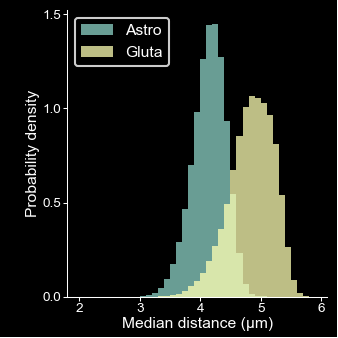

In [33]:
plot_classes = ['Astro','Gluta']

fig, ax = plt.subplots(figsize=(_single_col_width, _single_col_width), dpi=150)


for _cls in plot_classes:
    # extract values
    _mat = class_2_transMedianMat[_cls]
    _mat_vals = _mat[np.isfinite(_mat)]
    ax.hist(_mat_vals, bins=np.arange(2,6,0.1), alpha=0.75, density=True, label=f"{_cls}")

    
ax.set_yticks(np.arange(0,2,0.5))
ax.legend(fontsize=_font_size, loc='upper left', frameon=True, framealpha=1)

ax.set_xlabel(f"Median distance "+'(\u03BCm)', fontsize=_font_size, labelpad=1)
ax.set_ylabel(f"Probability density", fontsize=_font_size, labelpad=1)

ax.tick_params('both', labelsize=_font_size-1, 
                width=_ticklabel_width, length=_ticklabel_size,
                pad=1, labelleft=True, labelbottom=True) # remove bottom ticklabels for ax
[i[1].set_linewidth(_ticklabel_width) for i in ax.spines.items()]
ax.spines["top"].set_visible(False) # remove top frame
ax.spines["right"].set_visible(False) #remove right frame

fig.subplots_adjust(wspace=0.0, hspace=0.0, left=0.2, right=0.97, top=0.97, bottom=0.12)
plt.savefig(os.path.join(median_figure_folder, f"histogram_trans_median_distances.pdf"),
            transparent=True, bbox_inches='tight', dpi=300)
plt.savefig(os.path.join(median_figure_folder, f"histogram_trans_median_distances.png"),
            transparent=True, bbox_inches='tight', dpi=300)
plt.show()

<IPython.core.display.Javascript object>


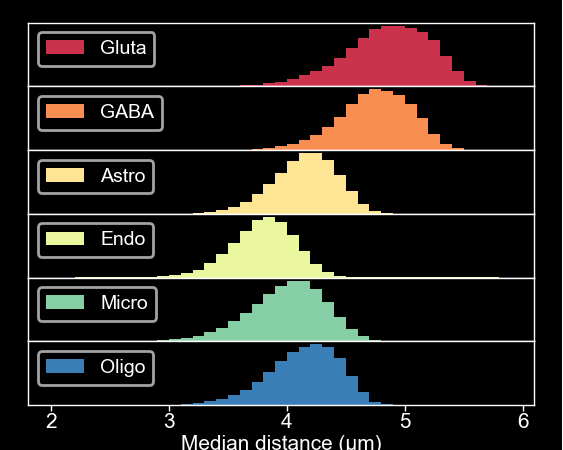

In [80]:
from matplotlib.cm import Spectral

sel_keys = list(class_2_transMedianMat.keys())
#plt.style.use('default')

#fig, axes = plt.subplots(,1, figsize=(6,5), sharex=True, sharey=False, dpi=100)
fig, axes = plt.subplots(len(sel_keys),1, figsize=(_single_col_width*1.25, _single_col_width),
                         sharex=True, dpi=200)

for _i, _ax in enumerate(axes):
    _key = sel_keys[_i]
    
    _mat = class_2_transMedianMat[_key]
    _mat_vals = _mat[np.isfinite(_mat)]
    
    _ax.hist(_mat_vals, bins=np.arange(2,6,0.1), 
             alpha=1, label=f'{_key}', color=Spectral((_i+0.5)/len(sel_keys)))
    _ax.legend(fontsize=_font_size-0.5, loc='upper left')
    
    _ax.tick_params('x', labelsize=_font_size, 
                    width=_ticklabel_width, length=_ticklabel_size,
                    labelleft=False,
                    pad=1, )
    _ax.tick_params('y', labelsize=_font_size, 
                    width=0, length=0,
                    labelleft=False,
                    pad=1, )
    [i[1].set_linewidth(_ticklabel_width) for i in _ax.spines.items()]


_ax.set_xlabel(f"Median distance "+'(\u03BCm)', fontsize=_font_size, labelpad=1)

fig.subplots_adjust(wspace=0.1, hspace=0., left=0.05, right=0.95, top=0.95, bottom=0.1)
fig.savefig(os.path.join(median_figure_folder, f"histogram_allMajorClass_trans_median.pdf"),
            transparent=True, bbox_inches='tight', pad_inches=0.1, dpi=300)
fig.savefig(os.path.join(median_figure_folder, f"histogram_allMajorClass_trans_median.png"),
            transparent=True, bbox_inches='tight', pad_inches=0.1, dpi=300)
plt.show()

# scatter

In [73]:
sel_chr = '7'
# class
sel_cls_1 = 'Gluta'
sel_cls_2 = 'Astro'#'GABA' 

mat_1 = class_2_medianDict[sel_cls_1][f"cis_{sel_chr}"]
mat_2 = class_2_medianDict[sel_cls_2][f"cis_{sel_chr}"]

In [74]:
from sklearn.linear_model import LinearRegression
#run regression
X = mat_1[np.triu_indices_from(mat_1,1)][:,np.newaxis]
y = mat_2[np.triu_indices_from(mat_2,1)]
#sel_inds = np.where()
reg = LinearRegression(fit_intercept=False).fit(X, y)
#Returns the coefficient of determination R^2 of the prediction.
reg.score(X, y)
#0.9725287282456724

0.9072347415009403

<IPython.core.display.Javascript object>


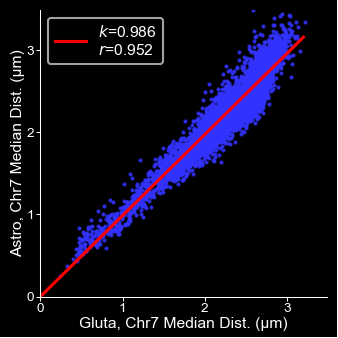

In [76]:
fig, ax = plt.subplots(figsize=(_single_col_width, _single_col_width), dpi=150)
ax.scatter(X[:,0], y, s=1, color=[0.2,0.2,1],#color=[0,0,0.5], 
           alpha=0.8)
line_x = np.arange(0, np.max(X), 0.1)
ax.plot(line_x[:,np.newaxis], reg.predict(line_x[:,np.newaxis]), 
        color='r', label=f'$k$={reg.coef_[0]:.3f}\n$r$={np.sqrt(reg.score(X, y)):.3f}')
ax.legend(fontsize=_font_size)

vmax = max(np.max(X), np.max(y))
ax.set_xlim([0, vmax])
ax.set_ylim([0, vmax])
ax.set_xticks(np.arange(0, vmax, 1))
ax.set_yticks(np.arange(0, vmax, 1))

ax.set_xlabel(f"{sel_cls_1}, Chr{sel_chr} Median Dist."+' (\u03BCm)', fontsize=_font_size, labelpad=1)
ax.set_ylabel(f"{sel_cls_2}, Chr{sel_chr} Median Dist."+' (\u03BCm)', fontsize=_font_size, labelpad=1)

ax.tick_params('both', labelsize=_font_size-1, 
                width=_ticklabel_width, length=_ticklabel_size,
                pad=1, labelleft=True, labelbottom=True) # remove bottom ticklabels for ax
[i[1].set_linewidth(_ticklabel_width) for i in ax.spines.items()]
ax.spines["top"].set_visible(False) # remove top frame
ax.spines["right"].set_visible(False) #remove right frame

fig.subplots_adjust(wspace=0.0, hspace=0.0, left=0.12, right=0.97, top=0.97, bottom=0.12)
plt.savefig(os.path.join(median_figure_folder, 
                         f"scatter_chr{sel_chr}_{sel_cls_1.replace('/','-').replace(' ','_')}-{sel_cls_2.replace('/','-').replace(' ','_')}.pdf"),
            transparent=True, bbox_inches='tight', dpi=300)
plt.savefig(os.path.join(median_figure_folder, 
                         f"scatter_chr{sel_chr}_{sel_cls_1.replace('/','-').replace(' ','_')}-{sel_cls_2.replace('/','-').replace(' ','_')}.png"),
            transparent=True, bbox_inches='tight', dpi=300)
plt.show()

In [69]:
y_pred = reg.predict(X)
residual_mat = reg.predict(np.reshape(mat_1, -1)[:,np.newaxis]).reshape(mat_1.shape) - mat_2

<IPython.core.display.Javascript object>


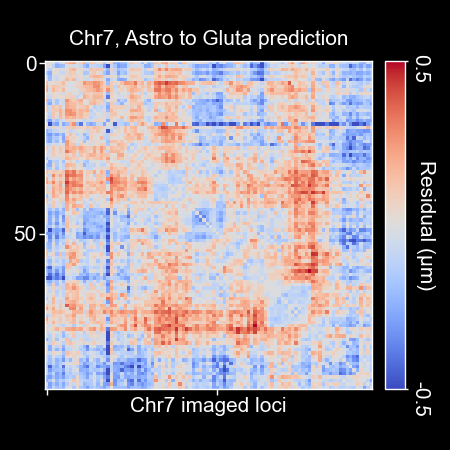

In [79]:
fig, ax1 = plt.subplots(figsize=(_single_col_width, _single_col_width), dpi=200)

# create a color map
#residual_cmap = cm.get_cmap('RdYlBu').copy()
residual_cmap = cm.get_cmap('coolwarm').copy()
residual_cmap.set_bad(color=[0.5,0.5,0.5,1])

vmin,vmax = -0.5, 0.5

_pf = ax1.imshow(residual_mat, 
                 cmap=residual_cmap, vmin=vmin, vmax=vmax, interpolation='nearest')

ax1.set_title(f"Chr{sel_chr}, {sel_cls_2} to {sel_cls_1} prediction", fontsize=_font_size)
ax1.set_xlabel(f"Chr{sel_chr} imaged loci", fontsize=_font_size, labelpad=3)
ax1.set_yticks(np.arange(0, len(chr_2_orders[sel_chr]), 50))
#ax1.set_yticklabels(_chr_names[:-1],)
ax1.set_xticks( np.arange(0, len(chr_2_orders[sel_chr]), 50))
#ax1.set_xticklabels(_chr_names[:-1], rotation=45)

ax1.xaxis.set_tick_params(which='both', labelbottom=True)
ax1.yaxis.set_tick_params(which='both', labelleft=True)
ax1.set_xlim([-0.5, len(chr_2_orders[sel_chr])-0.5])
ax1.set_ylim([len(chr_2_orders[sel_chr])-0.5, -0.5])

ax1.tick_params('both', labelsize=_font_size, 
                width=_ticklabel_width, length=_ticklabel_size,
                pad=1, labelleft=True, labelbottom=False) # remove bottom ticklabels for ax1
[i[1].set_linewidth(_ticklabel_width) for i in ax1.spines.items()]

# locate ax1
divider = make_axes_locatable(ax1)
# colorbar ax
cax = divider.append_axes('right', size='6%', pad="4%")
cbar = plt.colorbar(_pf,cax=cax, ax=ax1)
cbar.ax.tick_params('both', labelsize=_font_size, 
                width=_ticklabel_width, length=_ticklabel_size-1,
                pad=1, labelleft=False) # remove bottom ticklabels for ax1
[i[1].set_linewidth(_ticklabel_width) for i in cbar.ax.spines.items()]

cbar.set_ticks([vmin,vmax])
cbar.ax.set_yticklabels([vmin,vmax], rotation=270)
cbar.outline.set_linewidth(_ticklabel_width)
cbar.set_label('Residual (\u03BCm)', 
               fontsize=_font_size, labelpad=2, rotation=270)
cbar.ax.minorticks_off()
fig.subplots_adjust(wspace=0.05, hspace=0.2, left=0.1, right=0.9, top=0.9, bottom=0.1)
             
plt.savefig(os.path.join(median_figure_folder, 
                         f"residual_heatmap_chr{sel_chr}_{sel_cls_1.replace('/','-').replace(' ','_')}-{sel_cls_2.replace('/','-').replace(' ','_')}.pdf"),
            transparent=True, bbox_inches='tight', dpi=300)
plt.savefig(os.path.join(median_figure_folder, 
                         f"residual_heatmap_chr{sel_chr}_{sel_cls_1.replace('/','-').replace(' ','_')}-{sel_cls_2.replace('/','-').replace(' ','_')}.png"),
            transparent=True, bbox_inches='tight', dpi=300)
plt.show()

## given chromosome, calculate pairwise correlation between subclasses